Importing Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

Data Collection

In [61]:
exercise=pd.read_csv('exercise.csv')
calories=pd.read_csv('calories.csv')

Calories_Data=exercise.merge(calories,how='left',on='User_ID')

Calories_Data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


Data Preparation

In [62]:
Calories_Data.shape

(15000, 9)

In [63]:
Calories_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [64]:
Calories_Data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [65]:
Calories_Data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [66]:
Calories_Data.replace({'Gender':{'male':0,'female':1}},inplace=True)

<Axes: >

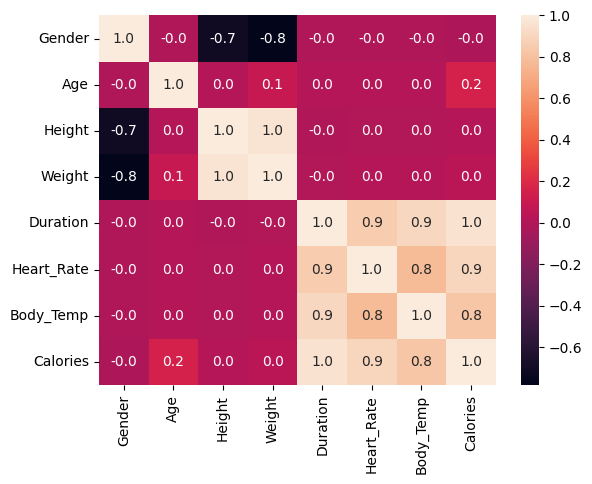

In [67]:
corr=Calories_Data.drop('User_ID',axis=1).corr()
sns.heatmap(data=corr,annot=True,fmt='0.1f')

<Axes: xlabel='Gender', ylabel='count'>

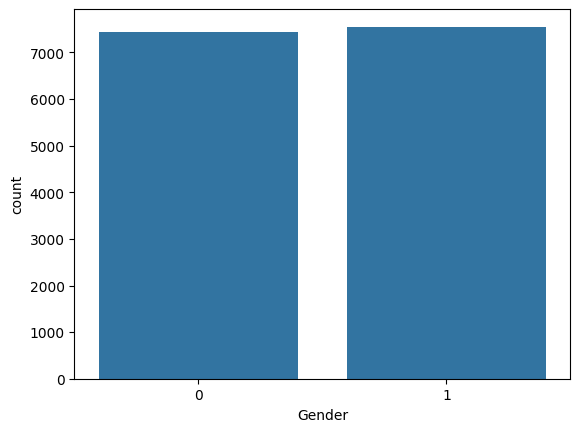

In [68]:
sns.countplot(x='Gender',data=Calories_Data)

<Axes: xlabel='Gender', ylabel='count'>

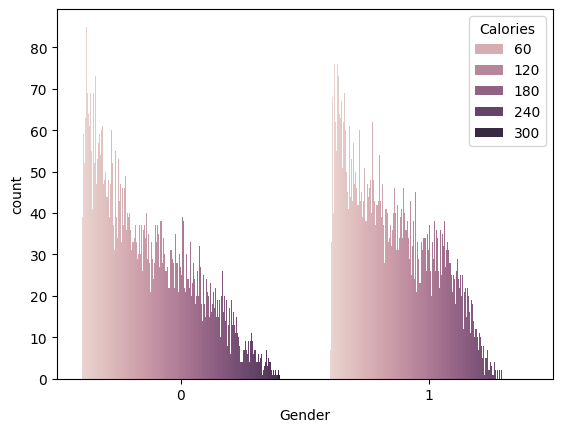

In [69]:
sns.countplot(x='Gender',hue='Calories',data=Calories_Data)

<Axes: xlabel='Height', ylabel='Density'>

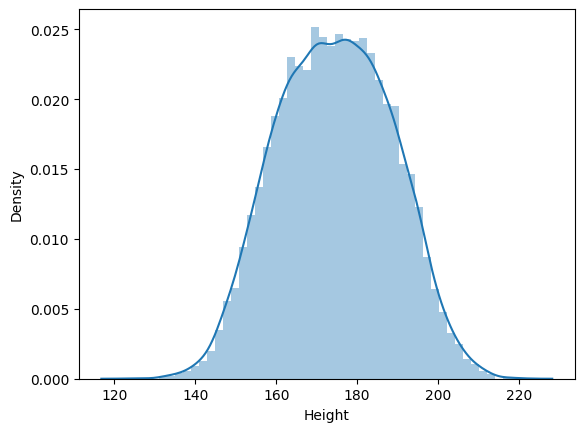

In [70]:
sns.distplot(Calories_Data['Height'])

<Axes: xlabel='Weight', ylabel='Density'>

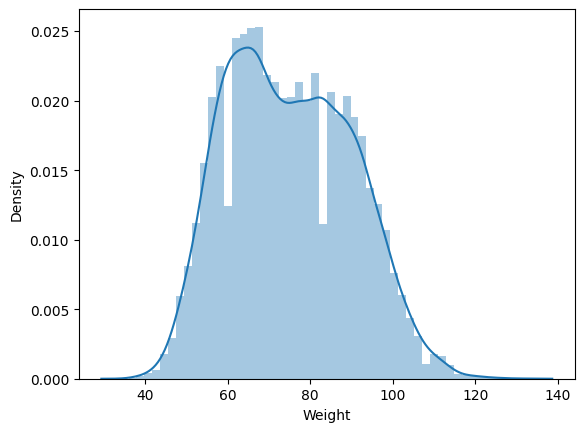

In [71]:
sns.distplot(Calories_Data['Weight'])

Train Test Split

In [72]:
X=Calories_Data.drop(['User_ID','Calories'],axis=1)
Y=Calories_Data['Calories']

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12000, 7)
(3000, 7)
(12000,)
(3000,)


Model Building

In [74]:
Model=XGBRegressor()
Model.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [75]:
y_train_pred=Model.predict(x_train)
r2=r2_score(y_train,y_train_pred)
print(r2)

0.9995777219604748


In [76]:
y_pred=Model.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.9988678909361673


Predective Mechanism

In [77]:
input=np.array([1,21,179.0,73.0,9.0,90.0,39.6]).reshape(1,-1)

pred=Model.predict(input)

print(pred) #37.0

[37.138016]
